## APST2 : Projet Model Based Clustering

EL TAHECH Hayat, NKODO Wilfrid, DAVID Romain, SIMON Antoine

## Introduction

Pour réaliser ce projet, nous avons utilisé des données sur les élections présidentielles françaises 2022. Le but est d'effectuer une classification en utilisant les mélanges gaussiens. On va donc essayer de voir quelles sont les régions similaires en termes de répartition des votes sur le premier tour des élections présidentielles françaises.

In [1]:
# Importation des librairies nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pylab import *
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Pré-traitement des données

Dans cette première partie, nous allons essayer de comprendre les données, les nettoyer : la suppression des doublons, la gestion des valeurs manquantes. 

In [60]:
# Importation des données

data_pres = pd.read_csv('C:/Users/user/Downloads/02-resultats-par-region.csv')

In [61]:
# Apercu du jeu de données

data_pres

,url,reg_code,reg_code_3,reg_name,num_tour,inscrits_nb,abstention_nb,abstention_pourc,votants_nb,blancs_nb,...,exprimes_nb,exprimes_pourc_inscrits,exprimes_pourc_votants,cand_num_panneau,cand_nom,cand_prenom,cand_civil,cand_nb_voix,cand_rapport_exprim,cand_rapport_inscrits
0,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,1,ARTHAUD,Nathalie,Mme,1084,0.80,0.34
1,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,2,ROUSSEL,Fabien,M.,668,0.49,0.21
2,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,3,MACRON,Emmanuel,M.,18137,13.43,5.74
3,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,4,LASSALLE,Jean,M.,1033,0.76,0.33
4,https://www.resultats-elections.interieur.gouv...,1,1,Guadeloupe,1,316023,174592,55.25,141431,2719,...,135085,42.75,95.51,5,LE PEN,Marine,Mme,24204,17.92,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,https://www.resultats-elections.interieur.gouv...,94,94,Corse,1,243039,90636,37.29,152403,2521,...,147936,60.87,97.07,8,HIDALGO,Anne,Mme,1589,1.07,0.65
212,https://www.resultats-elections.interieur.gouv...,94,94,Corse,1,243039,90636,37.29,152403,2521,...,147936,60.87,97.07,9,JADOT,Yannick,M.,4801,3.25,1.98
213,https://www.resultats-elections.interieur.gouv...,94,94,Corse,1,243039,90636,37.29,152403,2521,...,147936,60.87,97.07,10,PÉCRESSE,Valérie,Mme,9363,6.33,3.85
214,https://www.resultats-elections.interieur.gouv...,94,94,Corse,1,243039,90636,37.29,152403,2521,...,147936,60.87,97.07,11,POUTOU,Philippe,M.,1374,0.93,0.57


On affiche ci-dessous des informations générales sur notre jeu de données afin de mieux le comprendre.

In [62]:
data_pres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      216 non-null    object 
 1   reg_code                 216 non-null    int64  
 2   reg_code_3               216 non-null    int64  
 3   reg_name                 216 non-null    object 
 4   num_tour                 216 non-null    int64  
 5   inscrits_nb              216 non-null    int64  
 6   abstention_nb            216 non-null    int64  
 7   abstention_pourc         216 non-null    float64
 8   votants_nb               216 non-null    int64  
 9   blancs_nb                216 non-null    int64  
 10  blancs_pourc_inscrits    216 non-null    float64
 11  blancs_pourc_votants     216 non-null    float64
 12  nuls_nb                  216 non-null    int64  
 13  nuls_pourc_inscrits      216 non-null    float64
 14  nuls_pourc_votants       2

Puis on regarde ensuite si il y a des valeurs manquantes de manière à les nettoyer.

In [63]:
data_pres.isna().sum()

url                        0
reg_code                   0
reg_code_3                 0
reg_name                   0
num_tour                   0
inscrits_nb                0
abstention_nb              0
abstention_pourc           0
votants_nb                 0
blancs_nb                  0
blancs_pourc_inscrits      0
blancs_pourc_votants       0
nuls_nb                    0
nuls_pourc_inscrits        0
nuls_pourc_votants         0
exprimes_nb                0
exprimes_pourc_inscrits    0
exprimes_pourc_votants     0
cand_num_panneau           0
cand_nom                   0
cand_prenom                0
cand_civil                 0
cand_nb_voix               0
cand_rapport_exprim        0
cand_rapport_inscrits      0
dtype: int64

Notre jeu de données ne possède aucune donnée manquante. Regardons maintenant si il possède des doublons.

In [64]:
# On vérifier si il y a des doublons
duplicates = data_pres.duplicated()

# Afficher les lignes dupliquées
print(data_pres[duplicates])

Empty DataFrame
Columns: [url, reg_code, reg_code_3, reg_name, num_tour, inscrits_nb, abstention_nb, abstention_pourc, votants_nb, blancs_nb, blancs_pourc_inscrits, blancs_pourc_votants, nuls_nb, nuls_pourc_inscrits, nuls_pourc_votants, exprimes_nb, exprimes_pourc_inscrits, exprimes_pourc_votants, cand_num_panneau, cand_nom, cand_prenom, cand_civil, cand_nb_voix, cand_rapport_exprim, cand_rapport_inscrits]
Index: []

[0 rows x 25 columns]


Il possède également aucun doublon, il est ainsi prétraité.

Dans un premier temps, on va faire une première approche où l'on va essayer de trouver des *clusters* des régions en fonction uniquement du pourcentage de votes obtenus par chaque candidat puis dans un second temps, on va faire une deuxième approche où l'on va essayer de faire la même chose mais en tenant compte d'autres variables importantes du jeu de données.

## Première approche : Clustering des régions basé uniquement sur les résultats de chaques candidats

On définit maintenant notre base de données de travail pour cette partie, on prend juste les candidats, les régions et le pourcentage de votes obtenus pour chaque candidat qu'on réordonne dans un *dataframe*.

In [65]:
data_t = data_pres.reset_index().pivot(index='reg_name', columns='cand_nom', values='cand_rapport_exprim')
data_t

cand_nom,ARTHAUD,DUPONT-AIGNAN,HIDALGO,JADOT,LASSALLE,LE PEN,MACRON,MÉLENCHON,POUTOU,PÉCRESSE,ROUSSEL,ZEMMOUR
reg_name,,,,,,,,,,,,
Auvergne-Rhône-Alpes,0.55,2.33,1.83,5.31,3.22,22.28,27.75,21.20,0.72,5.15,2.28,7.39
Bourgogne-Franche-Comté,0.71,2.58,1.77,4.02,3.31,27.35,26.31,18.56,0.85,5.12,2.27,7.15
Bretagne,0.66,1.78,2.21,6.19,2.97,19.53,32.79,20.65,1.01,4.70,2.59,4.91
Centre-Val de Loire,0.69,2.36,1.72,4.04,2.87,25.86,28.53,18.68,0.83,5.33,2.50,6.58
Corse,0.31,1.76,1.07,3.25,10.42,28.58,18.11,13.37,0.93,6.33,3.08,12.80
Grand Est,0.67,2.68,1.43,4.01,2.77,29.54,27.28,17.63,0.80,4.33,1.70,7.17
Guadeloupe,0.80,1.56,1.68,1.43,0.76,17.92,13.43,56.16,0.53,2.95,0.49,2.29
Guyane,0.83,2.00,1.49,2.62,1.44,17.66,14.22,50.59,1.29,2.78,0.69,4.39
Hauts-de-France,0.69,1.82,1.34,3.13,2.05,33.35,25.40,18.98,0.69,3.53,3.11,5.90


Nous pouvons voir que nous avons 12 candidats et 18 régions. On va maintenant essayer de visualiser le pourcentage de votes obtenus pour chaque candidat dans les différentes régions.

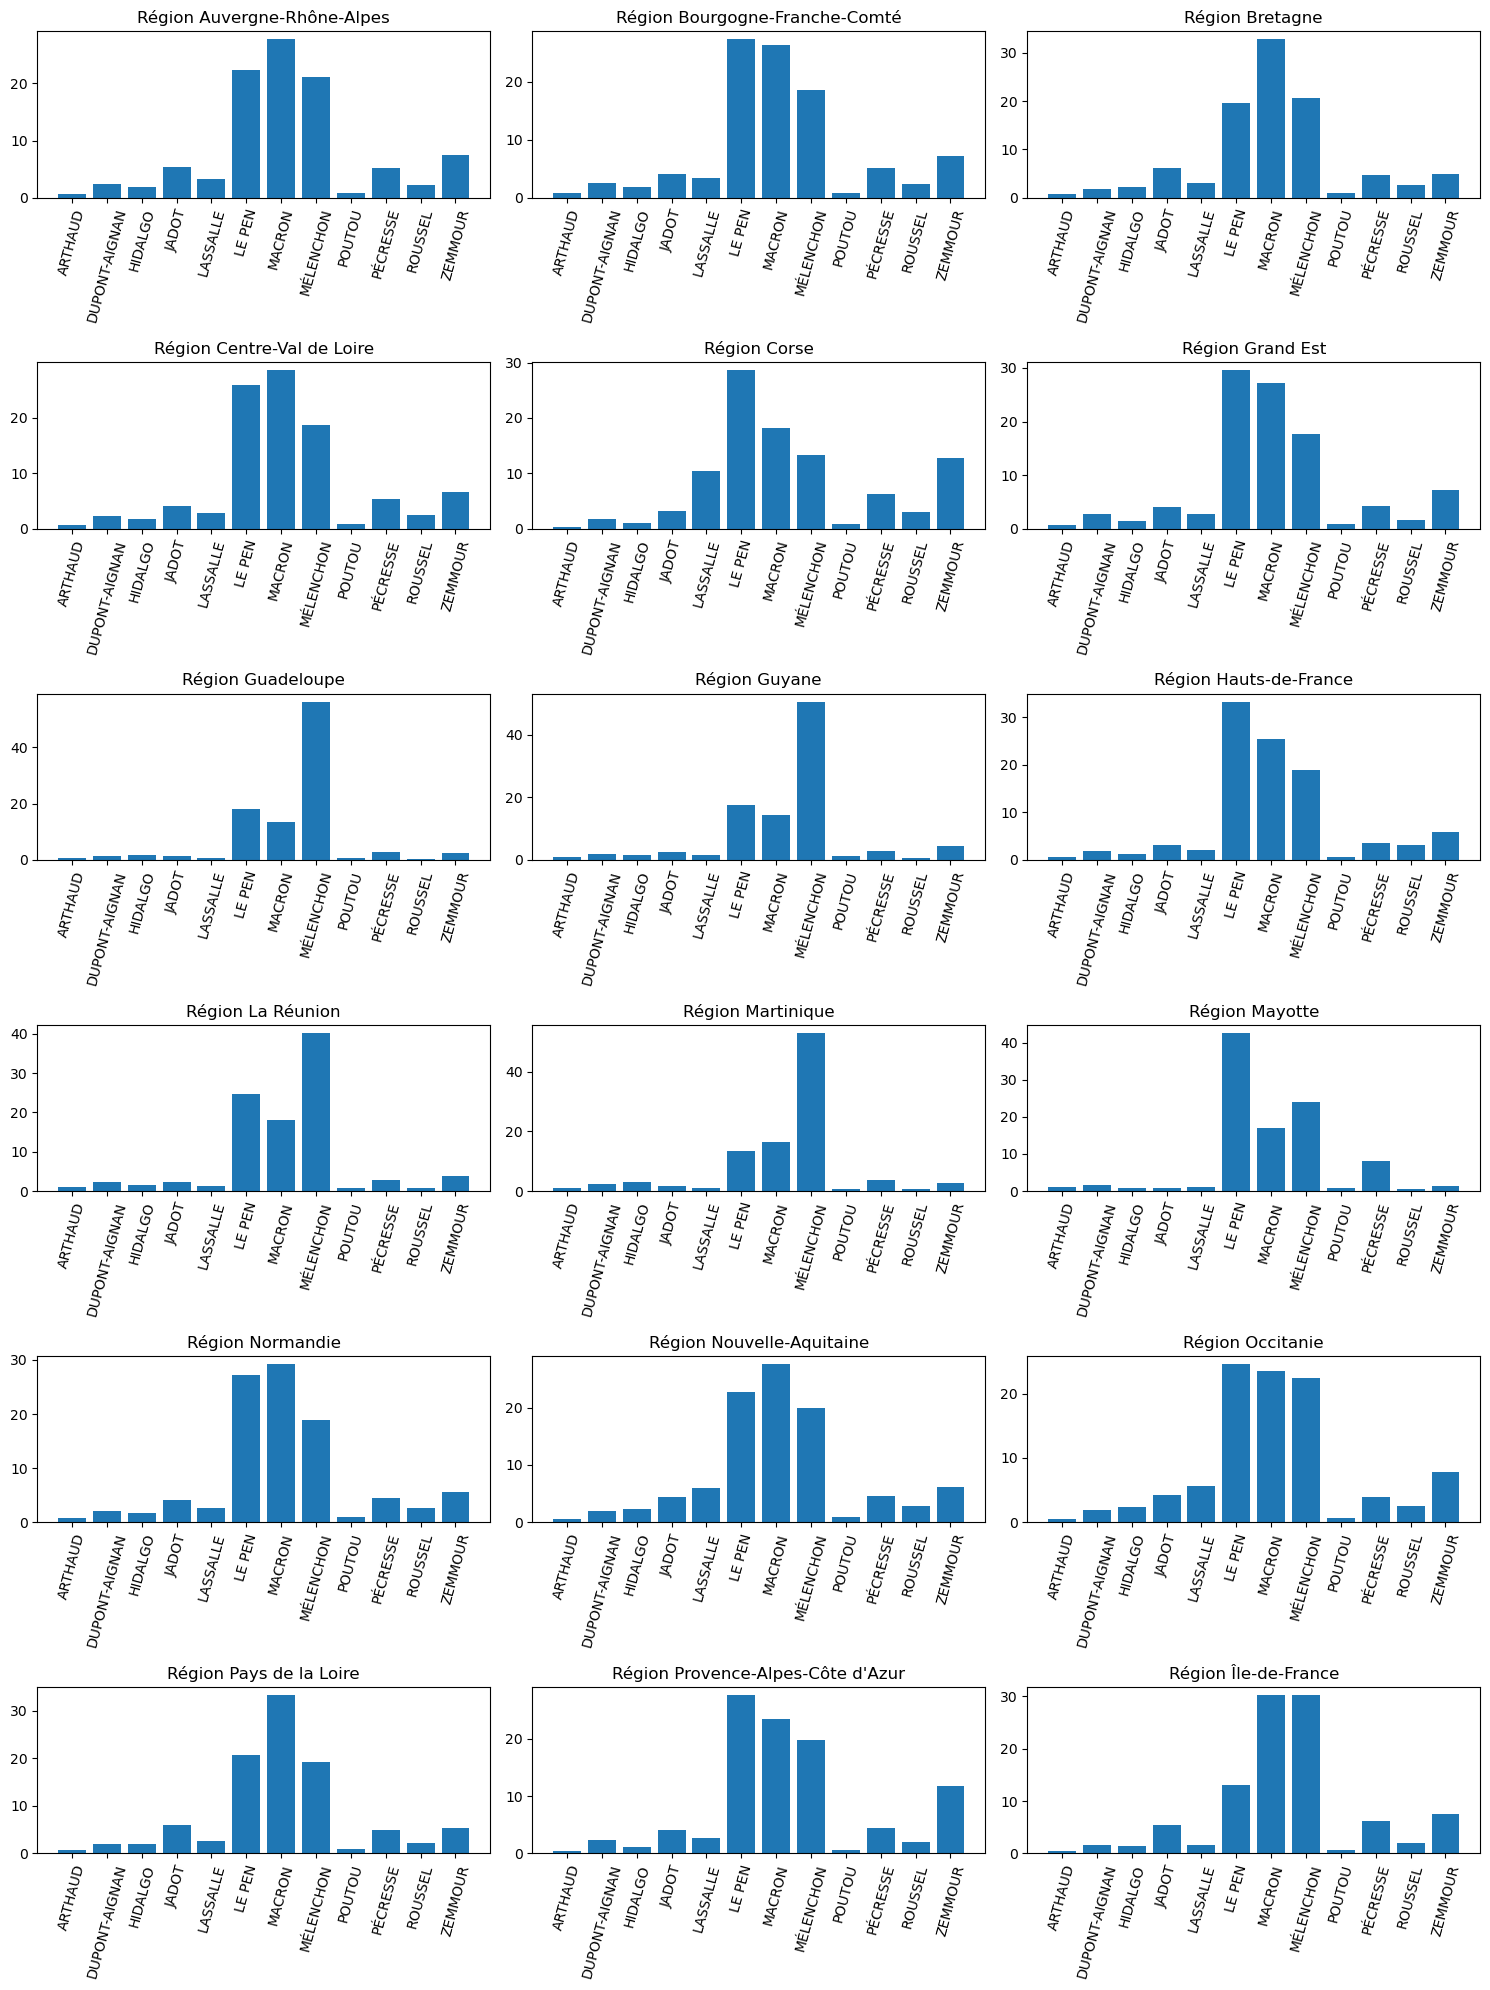

In [66]:
# Création des sous-plots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

# Création des barplots
for i,ax in enumerate(axes.flatten()):
    ax.bar(data_t.columns, data_t.iloc[i,:]);
    ax.set_title(str('Région ')+data_t.index[i])
    ax.set_xticklabels(data_t.columns, rotation=75)
    
# Configuration des marges entre les sous-graphiques
fig.subplots_adjust(hspace=1.2)

# Affichage des barplots
plt.tight_layout()
plt.show()

On remarque que pour chaque région les 3 candidats ayant le plus de pourcentage de votes pour eux sont : Emmanuel MACRON, Marine LE PEN et Jean-Luc MÉLENCHON.

### Modèle avec la France métropolitaine et les régions outre-mer

Nous allons maintenant effectuer un modèle de mélange gaussien en utilisant la fonction GaussianMixture de la librairie *sklearn* afin d'obtenir des clusters composée des différentes régions en fonction de la répartition des votes entre les différents candidats. Pour cela, on va tout d'abord chercher le nombre optimal de composantes du mélange gaussien afin d'avoir le meilleur modèle possible. On va déterminer le nombre optimal de composantes du mélange gaussien à l'aide du critère BIC que l'on doit minimiser.

In [67]:
# Normalisation des données
scaler = StandardScaler()
data_gmm_scaled = scaler.fit_transform(data_t)

# On définit le nombre maximum de composantes à tester
n_components_max = 10

# On initialise les listes pour stocker les BIC et les modèles
bic_score = []
gm_models = []

for n in range(1, n_components_max+1):
    gm = GaussianMixture(n_components=n,random_state=42)
    gm.fit(data_gmm_scaled)
    bic_score.append(gm.bic(data_gmm_scaled))
    gm_models.append(gm)



On trace maintenant le BIC en fonction du nombre de composantes du mélange gaussien afin de déterminer le plus petit score BIC et le nombre de composantes associées que l'on gardera pour notre modèle final.

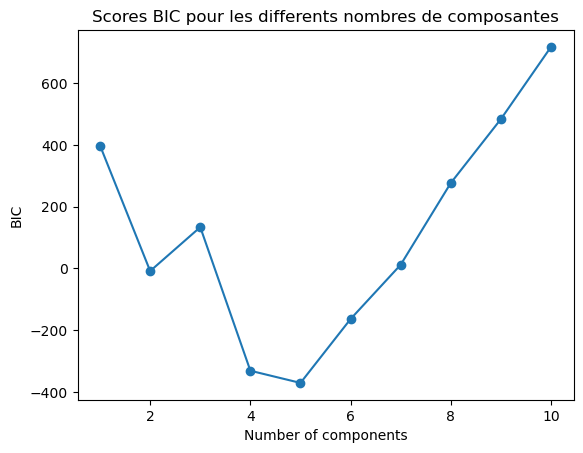

In [68]:
n_components = range(1,11)
plt.plot(n_components, bic_score, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Scores BIC pour les differents nombres de composantes')
plt.show()

In [69]:
# Code permettant d'obtenir le modèle avec le BIC le plus bas et le nombre de composantes associés

best_model_idx = np.argmin(bic_score)
best_gm_model = gm_models[best_model_idx]
best_n_components = best_gm_model.n_components
print('Le meilleur modèle est obtenu avec score BIC de : ',bic_score[best_model_idx])
print('Le nombre optimal de composante pour le mélange gaussien est donc: ',best_n_components)

Le meilleur modèle est obtenu avec score BIC de :  -371.02512544249635
Le nombre optimal de composante pour le mélange gaussien est donc:  5


On détermine maintenant les différents *clusters* avec le meilleur modèle obtenu.

In [70]:
best_gm_model = gm_models[best_model_idx]
clusters = best_gm_model.predict(data_gmm_scaled)
data_t['clusters']=clusters

Nous allons effectuer une analyse en composante principale afin de visualiser les données dans un espace réduit et observer les résultats obtenues ci-dessus.

In [17]:
# On détermine le nombre de composantes de notre ACP à l'aide pourcentage de variance expliquée par chaque composante 
# principale 

pca = PCA()
data_gmm_pca = pca.fit_transform(data_gmm_scaled)

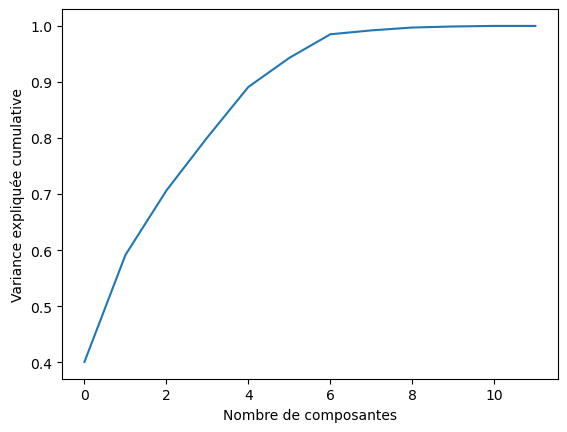

In [18]:
# On trace le plot du pourcentage de variance expliquée par chaque composante principale afin de déterminer le nombre de 
# composantes optimal pour notre ACP

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulative')
plt.show()

La règle dit qu'il faut conserver les composantes qui expliquent au moins 70% de la variance totale, ainsi on décide de garder 3 composantes principales.

In [19]:
# ACP avec 3 composantes principales

pca = PCA(n_components=3)
data_gmm_pca = pca.fit_transform(data_gmm_scaled)
pca_df = pd.DataFrame(data=data_gmm_pca, columns=['PCA 1', 'PCA 2','PCA 3'])
pca_df.index = data_t.index
pca_df['cluster'] = data_t['clusters']

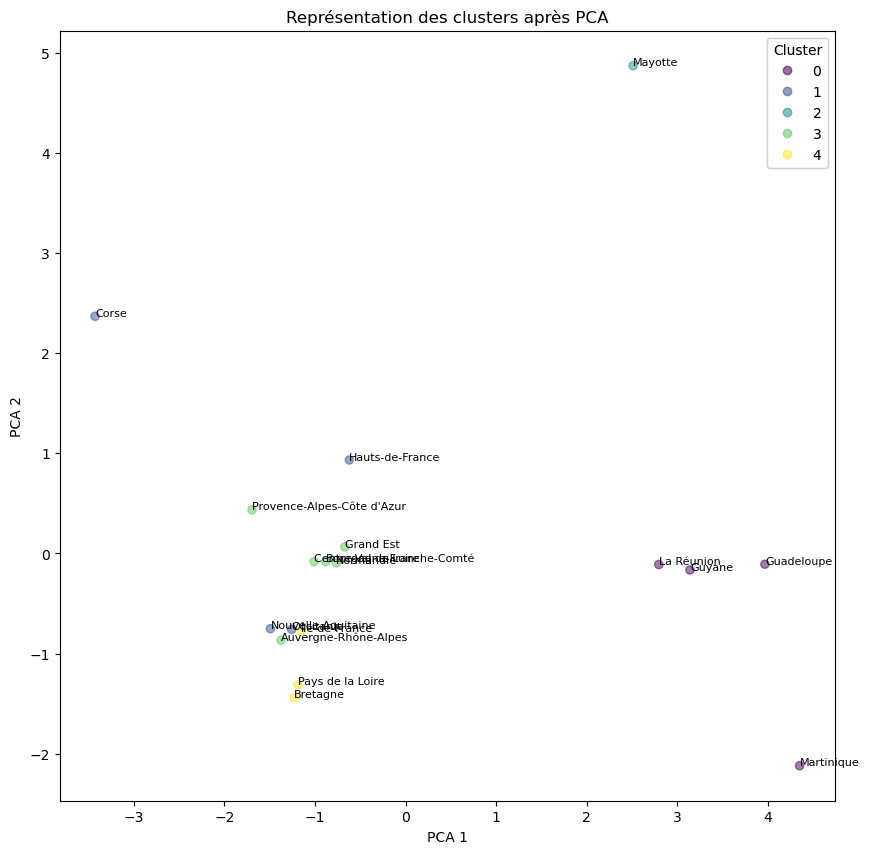

In [20]:
# Visualisation des résultats

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(pca_df['PCA 1'], pca_df['PCA 2'], c=pca_df['cluster'], cmap='viridis', alpha=0.5)

for i, txt in enumerate(pca_df.index):
    ax.annotate(txt, (pca_df['PCA 1'][i], pca_df['PCA 2'][i]), fontsize=8)

legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('Représentation des clusters après PCA')
ax.add_artist(legend)
plt.show()

In [21]:
print('Le cluster 1 est composé des régions suivantes : ', pca_df.index[pca_df['cluster']==0])
print('Le cluster 2 est composé des régions suivantes : ', pca_df.index[pca_df['cluster']==1])
print('Le cluster 3 est composé des régions suivantes : ', pca_df.index[pca_df['cluster']==2])
print('Le cluster 4 est composé des régions suivantes : ', pca_df.index[pca_df['cluster']==3])
print('Le cluster 5 est composé des régions suivantes : ', pca_df.index[pca_df['cluster']==4])

Le cluster 1 est composé des régions suivantes :  Index(['Guadeloupe', 'Guyane', 'La Réunion', 'Martinique'], dtype='object', name='reg_name')
Le cluster 2 est composé des régions suivantes :  Index(['Corse', 'Hauts-de-France', 'Nouvelle-Aquitaine', 'Occitanie'], dtype='object', name='reg_name')
Le cluster 3 est composé des régions suivantes :  Index(['Mayotte'], dtype='object', name='reg_name')
Le cluster 4 est composé des régions suivantes :  Index(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté',
       'Centre-Val de Loire', 'Grand Est', 'Normandie',
       'Provence-Alpes-Côte d'Azur'],
      dtype='object', name='reg_name')
Le cluster 5 est composé des régions suivantes :  Index(['Bretagne', 'Pays de la Loire', 'Île-de-France'], dtype='object', name='reg_name')


On ne voit pas grand chose sur le graphique mise à part que les régions d'outre mer sont dans le même *cluster* avec des votes en grandes majorités pour Jean-Luc Mélenchon hors Mayotte qui compose à elle seule son *cluster* avec des votes en grandes majorités pour Marine Le Pen puis pour Jean-Luc Mélenchon. Essayons de faire la même chose en enlevant les régions Outre-Mer pour voir si on obtient des *clusters* similaires sur la France Métropolitaine.

### Modèle avec seulement la France métropolitaine

In [22]:
# On enlève les régions outre-mer de notre jeu de données

data_so = data_t.copy()
data_so = data_so.drop(['Guadeloupe', 'La Réunion', 'Martinique', 'Guyane', 'Mayotte'],axis=0)

On choisit 3 composantes car on avait choisi 5 composantes sur le modèle ci-dessus et depuis on a enlevé les régions de 2 de ses 5 groupes obtenus.

In [23]:
# Normalisation des données
scaler = StandardScaler()
data_gmm_scaled1 = scaler.fit_transform(data_so.iloc[:,0:12])

# On applique la fonction GaussianMixture aux données
gm2 = GaussianMixture(n_components=3)
gm2.fit(data_gmm_scaled1)
clusters_so = gm2.predict(data_gmm_scaled1)
data_so['clusters']=clusters_so

On peut aussi vérifier la validité du mélange gaussien effectuer, tout d'abord on regarde s'il y a eu convergence lors de l'ajustement du modèle de mélange gaussien sur nos données. La convergence montre que l'optimisation du log vraisemblance a fonctionné et est un bon indicateur de la validité du modèle.

In [24]:
print("Le modèle gaussien a convergé : ",gm2.converged_)

Le modèle gaussien a convergé :  True


On vérifie ensuite les poids, s'ils sont normalisés et que les poids de chaque composante sont significativement différents. En effet, une différence significative entre les poids indique une structure de donnée unique ce qui est un bon signe quant à la validité de notre modèle.

In [49]:
weights = gm2.weights_

for i in range(len(weights)):
    print("Composante", i+1, ": poids =", weights[i])
    
print("Les poids sont ils normalisés ?",weights[0]+weights[1]+weights[2])

diff_weights = np.diff(weights)
print("Différences de poids entre les composantes : ", diff_weights)

Composante 1 : poids = 0.07692307692307707
Composante 2 : poids = 0.8461538461538459
Composante 3 : poids = 0.07692307692307707
Les poids sont ils normalisés ? 1.0
Différences de poids entre les composantes :  [ 0.76923077 -0.76923077]


Nous allons effectuer comme tout à l'heure une analyse en composante principale afin de visualiser les données dans un espace réduit et observer les résultats obtenus ci-dessus.

In [26]:
# On détermine le nombres de composantes de notre ACP à l'aide pourcentage de variance expliquée par chaque composante 
# principale 

pca1 = PCA()
data_gmm_pca1 = pca1.fit_transform(data_gmm_scaled1)

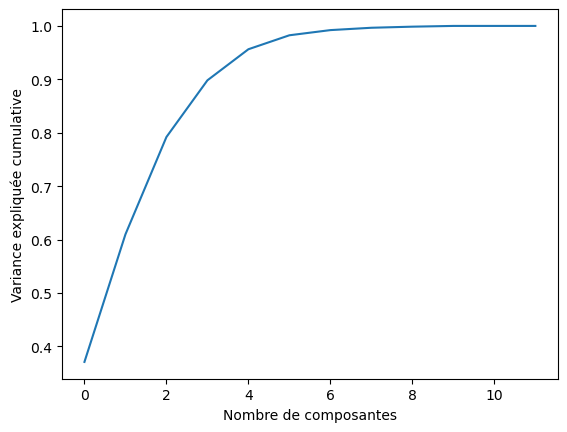

array([0.37099986, 0.60982311, 0.7920479 , 0.89818127, 0.95635755,
       0.98249785, 0.9921685 , 0.99656229, 0.99860832, 0.9999979 ,
       0.99999999, 1.        ])

In [27]:
# On trace le plot du pourcentage de variance expliquée par chaque composante principale afin de déterminer le nombre de 
# composantes optimal pour notre ACP

plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulative')
plt.show()
np.cumsum(pca1.explained_variance_ratio_)

On conserve les composantes qui expliquent au moins 70% de la variance totale, ainsi on décide de garder 3 composantes principales.

In [28]:
pca1 = PCA(n_components=3)
data_gmm_pca1 = pca.fit_transform(data_gmm_scaled1)

In [29]:
# ACP avec 3 composantes principales

pca1 = PCA(n_components=3)
data_gmm_pca1 = pca1.fit_transform(data_gmm_scaled1)
pca_df1 = pd.DataFrame(data=data_gmm_pca1, columns=['PCA 1', 'PCA 2','PCA 3'])
pca_df1.index = data_so.index
pca_df1['cluster'] = data_so['clusters']

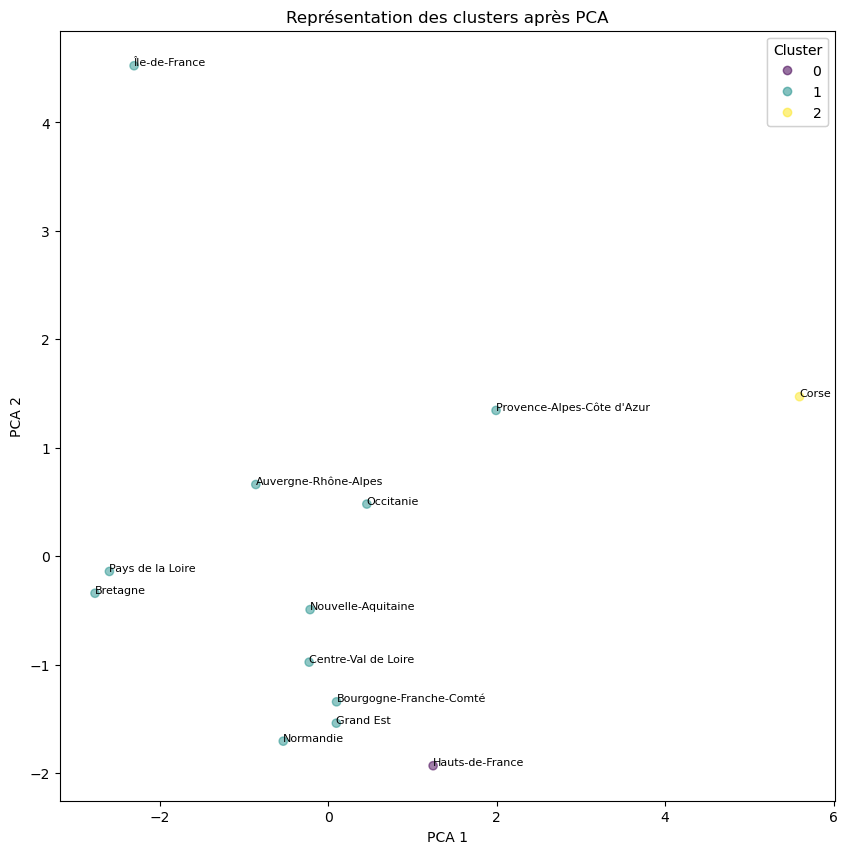

In [30]:
# Visualisation des résultats

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(pca_df1['PCA 1'], pca_df1['PCA 2'], c=pca_df1['cluster'], cmap='viridis', alpha=0.5)

for i, txt in enumerate(pca_df1.index):
    ax.annotate(txt, (pca_df1['PCA 1'][i], pca_df1['PCA 2'][i]), fontsize=8)

legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('Représentation des clusters après PCA')
ax.add_artist(legend)
plt.show()

In [31]:
print('Le cluster 1 est composé des régions suivantes : ', pca_df1.index[pca_df1['cluster']==0])
print('Le cluster 2 est composé des régions suivantes : ', pca_df1.index[pca_df1['cluster']==1])
print('Le cluster 3 est composé des régions suivantes : ', pca_df1.index[pca_df1['cluster']==2])

Le cluster 1 est composé des régions suivantes :  Index(['Hauts-de-France'], dtype='object', name='reg_name')
Le cluster 2 est composé des régions suivantes :  Index(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Grand Est', 'Normandie', 'Nouvelle-Aquitaine',
       'Occitanie', 'Pays de la Loire', 'Provence-Alpes-Côte d'Azur',
       'Île-de-France'],
      dtype='object', name='reg_name')
Le cluster 3 est composé des régions suivantes :  Index(['Corse'], dtype='object', name='reg_name')


On observe ici des *clusters* différents par rapport aux *clusters* obtenues pour le modèle avec toutes les régions même s'il y a des régions qui se retrouvent dans le même *cluster*. 

Ainsi, en comparant les deux modèles, on peut dire que les régions outre-mer hormis Mayotte sont similaires avec des votes en grandes majorités pour Jean-Luc Mélenchon. La région Mayotte, quant à elle, est isolée avec des votes en grandes majorités pour Marine Le Pen puis pour Jean-Luc Mélenchon. D'après le premier modèle, les régions Pays de La Loire, Bretagne et Ile-de-France sont équivalentes en termes des votes avec pour la plupart une tendance de vote pour Emmanuel Macron. Même si dans le deuxième modèle la région Ile-de-France se retrouve seul dans un cluster car il y a une égalité entre Emmanuel Macron et Jean-Luc Mélenchon. On a également dans le premier modèle un cluster qui regroupe les régions suivantes : Auvergne-Rhône-Alpes, Bourgogne-Franche-Comté, Centre-Val de Loire, Grand Est, Normandie, Provence-Alpes-Côte d'Azur avec une tendance de vote égale pour les candidats : Marine Le Pen, Emmanuel Macron et Jean-Luc Mélenchon. Dans le deuxième modèle, on les retrouve dans le même *cluster*. Enfin, on a un *cluster* qui regroupe les régions suivantes : Corse, Hauts-de-France, Nouvelle-Aquitaine, Occitanie avec une majorité de vote pour Marine Le Pen à part pour la région Nouvelle-Aquitaine même s'il a eu pas mal de vote pour elle. On remarque également que certaines régions sont dans des *clusters* avec des différences notables dans les préférences des électeurs pour les candidats par rapport aux autres régions présentent dans le *cluster*. Cela est certainement dû aux faits que ce sont les 3 mêmes candidats qui ont eu dans chaque régions le plus de vote pour eux. On va ainsi essayer de prendre en compte d'autres variables importantes afin d'essayer d'obtenir un meilleur *clustering* des régions.

## Seconde approche : *Clustering* des régions en tenant compte d'autres variables importantes

Dans cette seconde approche nous allons changer la manière dont nous avons traité les données. Le traitement des données débute par la suppression de variable qui ne représente pas d'intérêt dans le cadre de notre projet, l'URL , le prénom des candidats par exemple.

In [32]:
data_pres
columns_to_drop = ['url', 'reg_code', 'reg_code_3', 'num_tour', 'cand_num_panneau','cand_prenom', 'cand_civil']

data = data_pres.drop(columns_to_drop, axis=1)

In [33]:
data

,reg_name,inscrits_nb,abstention_nb,abstention_pourc,votants_nb,blancs_nb,blancs_pourc_inscrits,blancs_pourc_votants,nuls_nb,nuls_pourc_inscrits,nuls_pourc_votants,exprimes_nb,exprimes_pourc_inscrits,exprimes_pourc_votants,cand_nom,cand_nb_voix,cand_rapport_exprim,cand_rapport_inscrits
0,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,ARTHAUD,1084,0.80,0.34
1,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,ROUSSEL,668,0.49,0.21
2,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,MACRON,18137,13.43,5.74
3,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,LASSALLE,1033,0.76,0.33
4,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,LE PEN,24204,17.92,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Corse,243039,90636,37.29,152403,2521,1.04,1.65,1946,0.80,1.28,147936,60.87,97.07,HIDALGO,1589,1.07,0.65
212,Corse,243039,90636,37.29,152403,2521,1.04,1.65,1946,0.80,1.28,147936,60.87,97.07,JADOT,4801,3.25,1.98
213,Corse,243039,90636,37.29,152403,2521,1.04,1.65,1946,0.80,1.28,147936,60.87,97.07,PÉCRESSE,9363,6.33,3.85
214,Corse,243039,90636,37.29,152403,2521,1.04,1.65,1946,0.80,1.28,147936,60.87,97.07,POUTOU,1374,0.93,0.57


Nous allons ensuite afficher la matrice des corrélations afin de supprimer les variables redondantes. Cette étape est importante car les variables redondantes peuvent avoir un effet négatif sur notre modèle. De plus il ne s'agit pas ici de supprimer toutes les variables qui sont corrélées entre, il faut aussi garder un peu de contexte. Le but sera donc de supprimer une partie des variables corrélées entre elles à plus 0.8.

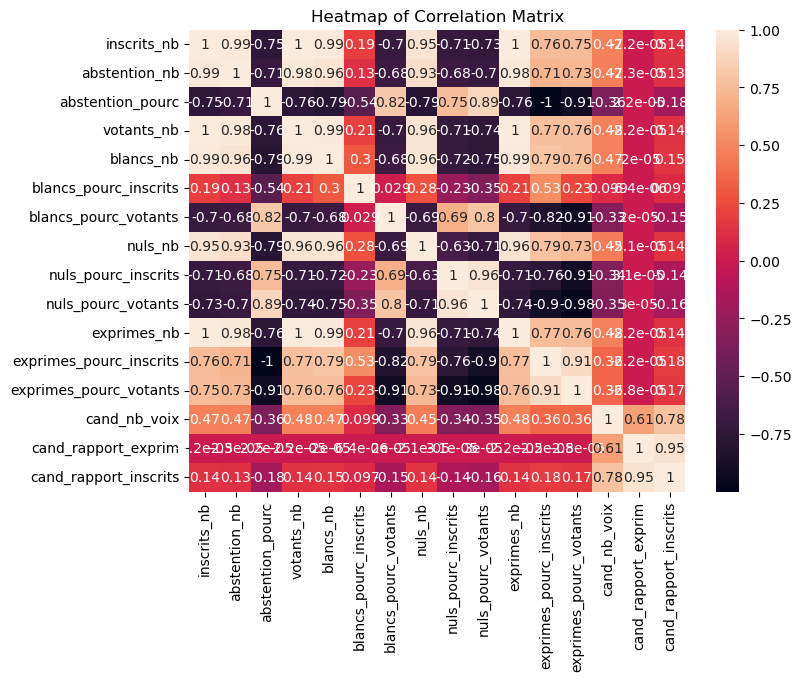

In [34]:
corr_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Afin d'avoir une lecture plus facile des variables concernées, nous allons afficher les variables corrélées deux à deux possédant un coefficient de Pearson supérieur à 0.8.

In [35]:
np.fill_diagonal(corr_matrix.values, 0)

high_correlations = []
for column in corr_matrix.columns:
    for index, row_value in corr_matrix.loc[corr_matrix[column] > 0.8, column].iteritems():
        high_correlations.append((column, index, row_value))
    for index, row_value in corr_matrix.loc[corr_matrix[column] < -0.8, column].iteritems():
        high_correlations.append((column, index, row_value))

for pair in high_correlations:
    print(f"{pair[0]} et {pair[1]}: {pair[2]:.2f}")

inscrits_nb et abstention_nb: 0.99
inscrits_nb et votants_nb: 1.00
inscrits_nb et blancs_nb: 0.99
inscrits_nb et nuls_nb: 0.95
inscrits_nb et exprimes_nb: 1.00
abstention_nb et inscrits_nb: 0.99
abstention_nb et votants_nb: 0.98
abstention_nb et blancs_nb: 0.96
abstention_nb et nuls_nb: 0.93
abstention_nb et exprimes_nb: 0.98
abstention_pourc et blancs_pourc_votants: 0.82
abstention_pourc et nuls_pourc_votants: 0.89
abstention_pourc et exprimes_pourc_inscrits: -1.00
abstention_pourc et exprimes_pourc_votants: -0.91
votants_nb et inscrits_nb: 1.00
votants_nb et abstention_nb: 0.98
votants_nb et blancs_nb: 0.99
votants_nb et nuls_nb: 0.96
votants_nb et exprimes_nb: 1.00
blancs_nb et inscrits_nb: 0.99
blancs_nb et abstention_nb: 0.96
blancs_nb et votants_nb: 0.99
blancs_nb et nuls_nb: 0.96
blancs_nb et exprimes_nb: 0.99
blancs_pourc_votants et abstention_pourc: 0.82
blancs_pourc_votants et exprimes_pourc_inscrits: -0.82
blancs_pourc_votants et exprimes_pourc_votants: -0.91
nuls_nb et insc

Au vu de cette liste, nous pouvons supprimer less variables suivantes: 'inscrits_nb','abstention_nb','votants_nb','nuls_pourc_inscrits','blancs_nb','nuls_nb','exprimes_nb', 'cand_nb_voix','exprimes_pourc_inscrits', 'cand_rapport_inscrits'. Il est important de noter que nous n'allons pas supprimés toutes les variables avec de la corrélation pour coller au contexte d'une élection présidentielle (le pourcentage d'abstention par exemple).

In [36]:
features_to_remove = ['inscrits_nb','abstention_nb','votants_nb','nuls_pourc_inscrits','blancs_nb','nuls_nb','exprimes_nb', 'cand_nb_voix','exprimes_pourc_inscrits', 'cand_rapport_inscrits']
data = data.drop(columns=features_to_remove)
data

,reg_name,abstention_pourc,blancs_pourc_inscrits,blancs_pourc_votants,nuls_pourc_votants,exprimes_pourc_votants,cand_nom,cand_rapport_exprim
0,Guadeloupe,55.25,0.86,1.92,2.56,95.51,ARTHAUD,0.80
1,Guadeloupe,55.25,0.86,1.92,2.56,95.51,ROUSSEL,0.49
2,Guadeloupe,55.25,0.86,1.92,2.56,95.51,MACRON,13.43
3,Guadeloupe,55.25,0.86,1.92,2.56,95.51,LASSALLE,0.76
4,Guadeloupe,55.25,0.86,1.92,2.56,95.51,LE PEN,17.92
...,...,...,...,...,...,...,...,...
211,Corse,37.29,1.04,1.65,1.28,97.07,HIDALGO,1.07
212,Corse,37.29,1.04,1.65,1.28,97.07,JADOT,3.25
213,Corse,37.29,1.04,1.65,1.28,97.07,PÉCRESSE,6.33
214,Corse,37.29,1.04,1.65,1.28,97.07,POUTOU,0.93


On va ensuite essayer de replacer les variables catégoriques par des valeurs de rangs. Pour les régions ce rang dépendra du nombre de votants et pour les candidates il s'agira du rang auquel le candidat est arrivé dans chaque région. Bien que les rangs soit toujours des variables catégoriques, il s'agit sûrement de la méthode qui se rapproche la plus d'une transformation continue de ces variables. En effet, il aurait été possible de regrouper par région ou candidat en appliquant ensuite une moyenne ou médiane sur les autres variables. Cependant cette méthode ne fait pas beaucoup de sens dans le contexte d'élection.

In [37]:
regions_sorted = data_pres.groupby('reg_name')['votants_nb'].sum().sort_values(ascending=False).reset_index()
regions_sorted['reg_rank'] = regions_sorted['votants_nb'].rank(ascending=False, method='min')
data = data.merge(regions_sorted[['reg_name', 'reg_rank']], on='reg_name', how='left')

In [38]:
candidates_sorted = data.groupby(['reg_name', 'cand_nom'])['cand_rapport_exprim'].sum().reset_index()
candidates_sorted['cand_rank'] = candidates_sorted.groupby('reg_name')['cand_rapport_exprim'].rank(ascending=False, method='min')
data = data.merge(candidates_sorted[['reg_name', 'cand_nom', 'cand_rank']], on=['reg_name', 'cand_nom'], how='left')


In [39]:
data.iloc[13:25,:]

,reg_name,abstention_pourc,blancs_pourc_inscrits,blancs_pourc_votants,nuls_pourc_votants,exprimes_pourc_votants,cand_nom,cand_rapport_exprim,reg_rank,cand_rank
13,Martinique,57.32,1.31,3.08,2.35,94.57,ROUSSEL,0.61,16.0,12.0
14,Martinique,57.32,1.31,3.08,2.35,94.57,MACRON,16.30,16.0,2.0
15,Martinique,57.32,1.31,3.08,2.35,94.57,LASSALLE,0.95,16.0,10.0
16,Martinique,57.32,1.31,3.08,2.35,94.57,LE PEN,13.42,16.0,3.0
17,Martinique,57.32,1.31,3.08,2.35,94.57,ZEMMOUR,2.56,16.0,6.0
18,Martinique,57.32,1.31,3.08,2.35,94.57,MÉLENCHON,53.10,16.0,1.0
19,Martinique,57.32,1.31,3.08,2.35,94.57,HIDALGO,3.20,16.0,5.0
20,Martinique,57.32,1.31,3.08,2.35,94.57,JADOT,1.61,16.0,8.0
21,Martinique,57.32,1.31,3.08,2.35,94.57,PÉCRESSE,3.85,16.0,4.0
22,Martinique,57.32,1.31,3.08,2.35,94.57,POUTOU,0.79,16.0,11.0


On normalise ensuite les données obtenues et on regarde quel nombre de composantes est le plus optimal en fonction du critère BIC.

In [40]:
columns_to_delete = ['cand_nom', 'reg_name']
data_gmm = data.drop(columns=columns_to_delete)

scaler = StandardScaler()
data_gmm_scaled = scaler.fit_transform(data_gmm)

n_components_max = 10

# On initialise les listes pour stocker les BIC et les modèles
bic_score = []
gm_models = []

for n in range(1, n_components_max+1):
    gm = GaussianMixture(n_components=n,random_state=42)
    gm.fit(data_gmm_scaled)
    bic_score.append(gm.bic(data_gmm_scaled))
    gm_models.append(gm)


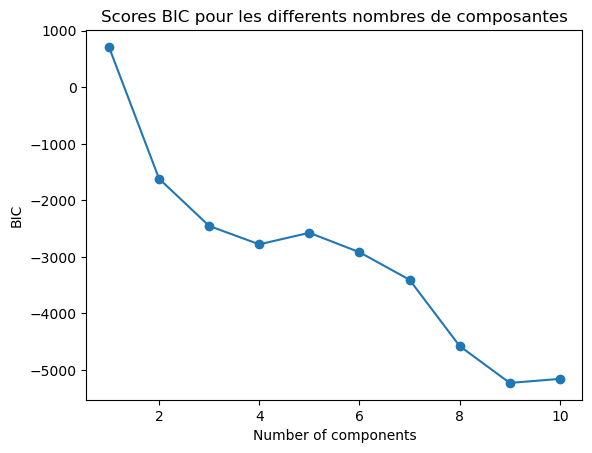

In [41]:
n_components = range(1,11)
plt.plot(n_components, bic_score, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Scores BIC pour les differents nombres de composantes')
plt.show()

En utilisant toutes les vraibles, le nombre de composantes optimales serait 9. Cela ne fait pas beaucoup de sens dans notre contexte, en effet un trop grand nombre de *clusters* va resulter en un manque d'interprétabilité et des risques de sur-ajustements. Afin d'éviter ce phénomène, on va essayer de coupler la recherche du nombre de composante avec un algorithme de *features selections*.

In [42]:
n_components_range = range(1,6) #On met 6 en max sinon il prend toujours le nb max de cluster et c'est pas bon

#recuperation de toutes les combinasions possible
feature_combinations = []
for k in range(1, data_gmm_scaled.shape[1] + 1):
    for i in range(data_gmm_scaled.shape[1] - k + 1):
        feature_combinations.append(list(range(i, i+k)))

# Paramètre pour le grisearch
params = {'n_components': n_components_range, 'covariance_type': ['full'], 'init_params': ['kmeans']}


best_features = None
best_n_components = None
best_bic = float("inf")
best_model = None

#Test toutes les combinaison et nb de features
for features in feature_combinations:
    data_k = data_gmm_scaled[:, features]
    for n_components in n_components_range:
        gmm_k = GaussianMixture(n_components=n_components)
        gmm_k.fit(data_k)
        bic_k = gmm_k.bic(data_k)
        if bic_k < best_bic:
            best_features = features
            best_n_components = n_components
            best_bic = bic_k
            best_model = gmm_k

# Afficher la meilleure combinaison de features, le meilleur nombre de composantes et le BIC correspondant
print("Meilleure combinaison de features :", best_features)
print("Meilleur nombre de composantes :", best_n_components)
print("BIC pour la meilleure combinaison de features et de nombre de composantes :", best_bic)

Meilleure combinaison de features : [0, 1, 2, 3, 4]
Meilleur nombre de composantes : 5
BIC pour la meilleure combinaison de features et de nombre de composantes : -4735.365492859832


On détermine maintenant les différents *clusters* avec le meilleur modèle obtenu.

In [43]:
data_p = data_gmm_scaled[:, best_features]
clusters = best_model.predict(data_p)
data['clusters']=clusters

Nous allons effectuer une analyse en composante principale afin de visualiser les données dans un espace réduit et observer les résultats obtenues ci-dessus.

In [44]:
# On détermine le nombres de composantes de notre ACP à l'aide pourcentage de variance expliquée par chaque composante 
# principale 

pca = PCA()
data_gmm_pca2 = pca.fit_transform(data_p)

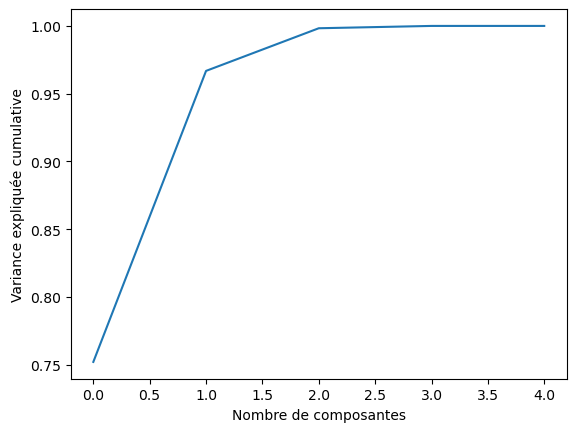

array([0.75202236, 0.96681099, 0.99828286, 0.99999939, 1.        ])

In [45]:
# On trace le plot du pourcentage de variance expliquée par chaque composante principale afin de déterminer le nombre de 
# composantes optimal pour notre ACP

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulative')
plt.show()
np.cumsum(pca.explained_variance_ratio_)

On conserve les composantes qui expliquent au moins 70% de la variance totale, ainsi on décide de garder 2 composantes principales.

In [46]:
# ACP avec 3 composantes principales

pca = PCA(n_components=2)
data_gmm_pca = pca.fit_transform(data_p)
pca_df = pd.DataFrame(data=data_gmm_pca, columns=['PCA 1', 'PCA 2'])
pca_df['region'] = data['reg_name']
pca_df['cluster'] = data['clusters']

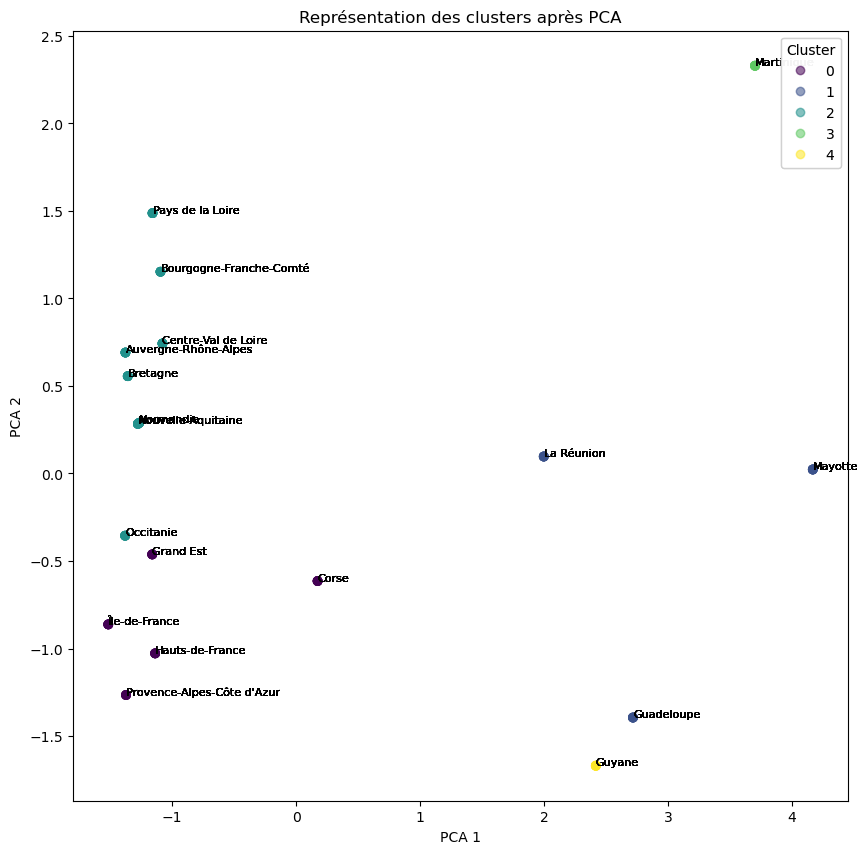

In [47]:
# Visualisation des résultats

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter(pca_df['PCA 1'], pca_df['PCA 2'], c=pca_df['cluster'], cmap='viridis', alpha=0.5)

for i, txt in enumerate(pca_df['region']):
    ax.annotate(txt, (pca_df['PCA 1'][i], pca_df['PCA 2'][i]), fontsize=8)

legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('Représentation des clusters après PCA')
ax.add_artist(legend)
plt.show()

In [48]:
print('Le cluster 1 est composé des régions suivantes : ', pca_df.region[pca_df['cluster']==0].unique())
print('Le cluster 2 est composé des régions suivantes : ', pca_df.region[pca_df['cluster']==1].unique())
print('Le cluster 3 est composé des régions suivantes : ', pca_df.region[pca_df['cluster']==2].unique())
print('Le cluster 4 est composé des régions suivantes : ', pca_df.region[pca_df['cluster']==3].unique())
print('Le cluster 5 est composé des régions suivantes : ', pca_df.region[pca_df['cluster']==4].unique())

Le cluster 1 est composé des régions suivantes :  ['Île-de-France' 'Hauts-de-France' 'Grand Est'
 "Provence-Alpes-Côte d'Azur" 'Corse']
Le cluster 2 est composé des régions suivantes :  ['Guadeloupe' 'La Réunion' 'Mayotte']
Le cluster 3 est composé des régions suivantes :  ['Centre-Val de Loire' 'Bourgogne-Franche-Comté' 'Normandie'
 'Pays de la Loire' 'Bretagne' 'Nouvelle-Aquitaine' 'Occitanie'
 'Auvergne-Rhône-Alpes']
Le cluster 4 est composé des régions suivantes :  ['Martinique']
Le cluster 5 est composé des régions suivantes :  ['Guyane']


In [51]:
print("Le modèle gaussien a convergé : ",best_model.converged_)
weights = best_model.weights_

for i in range(len(weights)):
    print("Co+weights[2]demposante", i+1, ": poids =", weights[i])
    
print("Les poids sont ils normalisés ?",weights[0]+weights[1]+weights[2]+weights[3]+weights[4])

diff_weights = np.diff(weights)
print("Différences de poids entre les composantes : ", diff_weights)

Le modèle gaussien a convergé :  True
Composante 1 : poids = 0.27774307023109635
Composante 2 : poids = 0.16666666666666666
Composante 3 : poids = 0.44447915199112586
Composante 4 : poids = 0.055555555555555566
Composante 5 : poids = 0.055555555555555566
Les poids sont ils normalisés ? 1.0
Différences de poids entre les composantes :  [-0.1110764   0.27781249 -0.3889236   0.        ]


Le modèle gaussien a bien convergé. Les points de certaines composantes semblent indiquer des structures uniques sur les données. En observant la representation des clusters sur les deux composantes principales de l'ACP, on observe des "problèmes sur le *clustering*. On remarque par exemple des *clusters* contenant une seule region comme la Martinique ou la Guyane. On remarque aussi comme dans la partie précédente une forte différence entre les régions métropolitaines et les outres mer. Ce *clustering* n'est donc pas satisfaifaint. On peut donc essayer une dernière approche sans les régions en prenant la moyenne pour les candidats.

## Conclusion